# Clean Water and Sanitation

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
#importing the data
df=pd.read_csv('Sanitation.csv')

In [4]:
df

,ULB Name,Public Toilets,Community Toilets,She Toilets,ODF Declared Wards,ODF Non Declared Wards,Compost Yard Location & Extent (Acrs),Dry Resourse Collection Center (Yes/No),% of Door to Door Collection,Tractors,Autos,Tricycles,Pushcarts,Regular Workers,Out Sourced Workers,Government Hospitals,Private Hospitals,Urban Health Centres,Garbage generation/day (Mts),Garbage lifted/day (Mts)
0,Adilabad,8.0,NaN,NaN,36,0,36.20,YES,100.0,12,18,5,30,52,200,1,13,4,66.0,64.0
1,Andol-Jogipet,NaN,NaN,NaN,10,10,3.27,YES,89.0,1,0,12,3,11,37,1,5,0,4.7,3.9
2,Armoor,4.0,NaN,NaN,23,0,11.09,YES,100.0,5,10,0,0,17,67,1,25,0,32.0,30.0
3,Atchampet,NaN,NaN,NaN,20,0,0.00,NO,85.0,9,0,5,0,2,74,2,8,0,14.0,14.0
4,Badangpet,NaN,NaN,NaN,20,0,0.00,YES,100.0,4,30,15,0,0,168,1,3,0,28.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Vikarabad,3.0,NaN,NaN,28,0,10.01,YES,95.0,3,11,0,0,23,105,3,17,0,25.0,25.0
68,Wanaparthy,NaN,NaN,NaN,13,13,0.00,NO,84.0,11,0,0,2,17,110,1,8,2,32.0,32.0
69,Warangal,1.0,NaN,NaN,0,58,0.00,NaN,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0
70,Yellandu,NaN,NaN,NaN,22,2,5.00,NO,89.0,4,2,8,24,34,56,1,5,0,32.0,30.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ULB Name                                 72 non-null     object 
 1   Public Toilets                           31 non-null     float64
 2   Community Toilets                        13 non-null     float64
 3   She Toilets                              10 non-null     float64
 4   ODF Declared Wards                       72 non-null     int64  
 5   ODF Non Declared Wards                   72 non-null     int64  
 6   Compost Yard Location & Extent (Acrs)    72 non-null     float64
 7   Dry Resourse Collection Center (Yes/No)  60 non-null     object 
 8   % of Door to Door Collection             72 non-null     float64
 9   Tractors                                 72 non-null     int64  
 10  Autos                                    72 non-null

In [6]:
df.shape


(72, 20)

In [7]:
df.columns

Index(['ULB Name', 'Public Toilets', 'Community Toilets', 'She Toilets',
       'ODF Declared Wards', 'ODF Non Declared Wards',
       'Compost Yard Location & Extent (Acrs)',
       'Dry Resourse Collection Center (Yes/No)',
       '% of Door to Door Collection', 'Tractors', 'Autos', 'Tricycles',
       'Pushcarts', 'Regular Workers', 'Out Sourced Workers',
       'Government Hospitals', 'Private Hospitals', 'Urban Health Centres',
       'Garbage generation/day (Mts)', 'Garbage lifted/day (Mts)'],
      dtype='object')

In [8]:
df.describe()

,Public Toilets,Community Toilets,She Toilets,ODF Declared Wards,ODF Non Declared Wards,Compost Yard Location & Extent (Acrs),% of Door to Door Collection,Tractors,Autos,Tricycles,Pushcarts,Regular Workers,Out Sourced Workers,Government Hospitals,Private Hospitals,Urban Health Centres,Garbage generation/day (Mts),Garbage lifted/day (Mts)
count,31.000000,13.000000,10.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,3.419355,1.538462,1.300000,23.291667,3.958333,5.993194,75.988611,8.625000,5.402778,8.694444,3.305556,24.611111,116.500000,1.000000,17.930556,0.888889,30.387222,26.516111
std,3.253451,1.853617,0.483046,10.864644,10.161287,10.094007,32.893282,19.841227,8.568958,21.555457,7.062376,36.254016,133.922513,1.007018,25.077528,1.429622,39.038642,32.056076
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,79.500000,2.750000,0.000000,0.000000,0.000000,0.750000,53.500000,0.750000,5.000000,0.000000,7.500000,6.000000
50%,2.000000,1.000000,1.000000,20.000000,0.000000,1.300000,85.500000,4.000000,2.500000,0.000000,0.000000,13.500000,82.500000,1.000000,10.000000,0.000000,21.500000,19.500000
75%,4.000000,2.000000,1.750000,30.250000,0.000000,7.200000,96.875000,8.000000,8.000000,10.000000,2.000000,34.500000,139.750000,1.000000,22.000000,1.000000,34.750000,32.000000
max,16.000000,7.000000,2.000000,50.000000,58.000000,55.000000,100.000000,160.000000,46.000000,150.000000,30.000000,225.000000,849.000000,7.000000,123.000000,7.000000,209.000000,185.000000


In [9]:
df.nunique()

ULB Name                                   72
Public Toilets                             10
Community Toilets                           5
She Toilets                                 2
ODF Declared Wards                         23
ODF Non Declared Wards                     17
Compost Yard Location & Extent (Acrs)      28
Dry Resourse Collection Center (Yes/No)     2
% of Door to Door Collection               25
Tractors                                   23
Autos                                      19
Tricycles                                  17
Pushcarts                                  16
Regular Workers                            34
Out Sourced Workers                        53
Government Hospitals                        5
Private Hospitals                          30
Urban Health Centres                        7
Garbage generation/day (Mts)               40
Garbage lifted/day (Mts)                   45
dtype: int64

### Data Cleaning and Preprocessing

In [10]:
#cleaning the data
df.isnull().sum().sort_values(ascending=False)

She Toilets                                62
Community Toilets                          59
Public Toilets                             41
Dry Resourse Collection Center (Yes/No)    12
Garbage lifted/day (Mts)                    0
Garbage generation/day (Mts)                0
ODF Declared Wards                          0
ODF Non Declared Wards                      0
Compost Yard Location & Extent (Acrs)       0
% of Door to Door Collection                0
Tractors                                    0
Autos                                       0
Tricycles                                   0
Pushcarts                                   0
Regular Workers                             0
Out Sourced Workers                         0
Government Hospitals                        0
Private Hospitals                           0
Urban Health Centres                        0
ULB Name                                    0
dtype: int64

Since nearly 90% of the data in the column She Toilets in null.Let's drop the column


In [11]:
df.drop(['She Toilets','Public Toilets', 'Community Toilets'],inplace=True, axis=1)

In [12]:
#imputing the missing data
df['Dry Resourse Collection Center (Yes/No)']=df['Dry Resourse Collection Center (Yes/No)'].fillna(df['Dry Resourse Collection Center (Yes/No)'].mode()[0])

In [13]:
df.isnull().sum()

ULB Name                                   0
ODF Declared Wards                         0
ODF Non Declared Wards                     0
Compost Yard Location & Extent (Acrs)      0
Dry Resourse Collection Center (Yes/No)    0
% of Door to Door Collection               0
Tractors                                   0
Autos                                      0
Tricycles                                  0
Pushcarts                                  0
Regular Workers                            0
Out Sourced Workers                        0
Government Hospitals                       0
Private Hospitals                          0
Urban Health Centres                       0
Garbage generation/day (Mts)               0
Garbage lifted/day (Mts)                   0
dtype: int64

In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

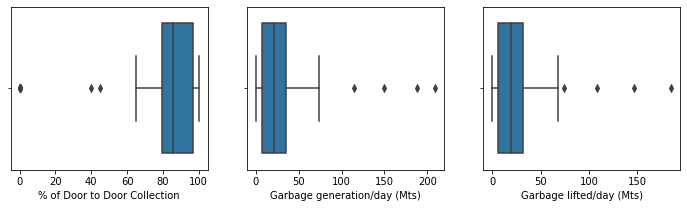

In [15]:
#Let's check for outliers 
plt.rcParams['figure.figsize']=(12,3)

plt.subplot(1,3,1)
sns.boxplot(df['% of Door to Door Collection'])

plt.subplot(1,3,2)
sns.boxplot(df['Garbage generation/day (Mts)'])

plt.subplot(1,3,3)
sns.boxplot(df['Garbage lifted/day (Mts)'])
plt.show()


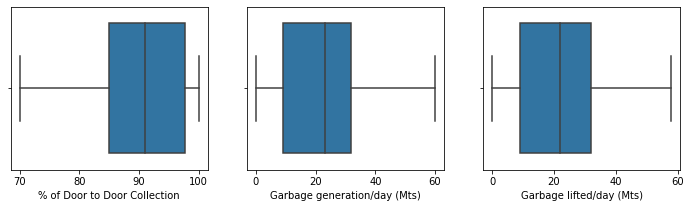

In [16]:
#Let's remove the outliers
df=df[df['% of Door to Door Collection']>=70]
df=df[df['Garbage generation/day (Mts)']<=80]
df=df[df['Garbage lifted/day (Mts)']<=60]

#Checking outliers again
plt.rcParams['figure.figsize']=(12,3)

plt.subplot(1,3,1)
sns.boxplot(df['% of Door to Door Collection'])

plt.subplot(1,3,2)
sns.boxplot(df['Garbage generation/day (Mts)'])

plt.subplot(1,3,3)
sns.boxplot(df['Garbage lifted/day (Mts)'])
plt.show()


### Data Exploration and Visualisation

In [17]:
#list of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('Number if numerical variables:',len(numerical_features))

#visualise the numerical variables
df[numerical_features].head()

Number if numerical variables: 15


,ODF Declared Wards,ODF Non Declared Wards,Compost Yard Location & Extent (Acrs),% of Door to Door Collection,Tractors,Autos,Tricycles,Pushcarts,Regular Workers,Out Sourced Workers,Government Hospitals,Private Hospitals,Urban Health Centres,Garbage generation/day (Mts),Garbage lifted/day (Mts)
1,10,10,3.27,89.0,1,0,12,3,11,37,1,5,0,4.7,3.9
2,23,0,11.09,100.0,5,10,0,0,17,67,1,25,0,32.0,30.0
3,20,0,0.00,85.0,9,0,5,0,2,74,2,8,0,14.0,14.0
4,20,0,0.00,100.0,4,30,15,0,0,168,1,3,0,28.0,28.0
5,20,0,0.00,96.5,0,0,0,0,23,120,1,5,0,14.0,13.0


In [18]:
df.columns

Index(['ULB Name', 'ODF Declared Wards', 'ODF Non Declared Wards',
       'Compost Yard Location & Extent (Acrs)',
       'Dry Resourse Collection Center (Yes/No)',
       '% of Door to Door Collection', 'Tractors', 'Autos', 'Tricycles',
       'Pushcarts', 'Regular Workers', 'Out Sourced Workers',
       'Government Hospitals', 'Private Hospitals', 'Urban Health Centres',
       'Garbage generation/day (Mts)', 'Garbage lifted/day (Mts)'],
      dtype='object')

In [19]:
df['Dry Resourse Collection Center (Yes/No)'].value_counts()

YES    28
NO     22
Name: Dry Resourse Collection Center (Yes/No), dtype: int64

In [20]:
compost_yard=df['Compost Yard Location & Extent (Acrs)'].value_counts() 

In [21]:
compost_yard

0.00     24
5.00      8
10.00     3
7.02      1
22.00     1
7.00      1
7.50      1
11.00     1
16.25     1
5.80      1
3.27      1
5.03      1
7.10      1
0.10      1
8.39      1
13.22     1
11.09     1
10.01     1
Name: Compost Yard Location & Extent (Acrs), dtype: int64

Out of the 71 ULB, 24 of them does not have compost yard ie 33% of them.And about 45% of the ULB has  compost yard which extents more than or equal to 10 acres.


In [22]:
c=df['% of Door to Door Collection']

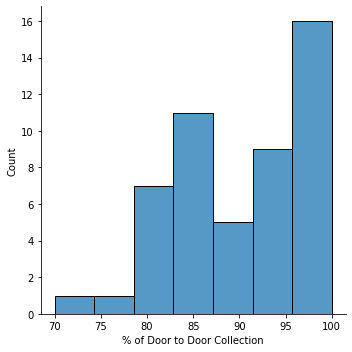

In [23]:
sns.displot(c)

Most ULBs has a decent percentage if Door to Door Collection

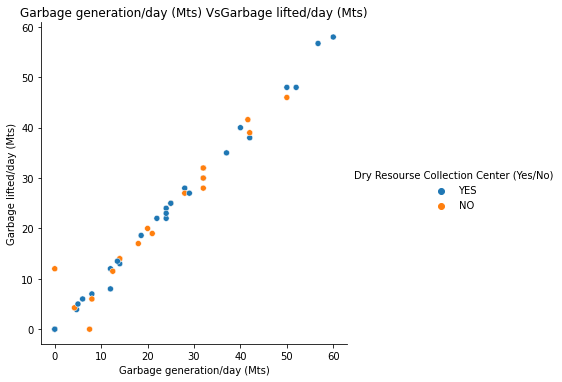

In [24]:
sns.relplot(x='Garbage generation/day (Mts)',y='Garbage lifted/day (Mts)',hue='Dry Resourse Collection Center (Yes/No)',data=df)
plt.title('Garbage generation/day (Mts) VsGarbage lifted/day (Mts)');

There is a linear relation between the garbage generated and lifted per day (in Mts)

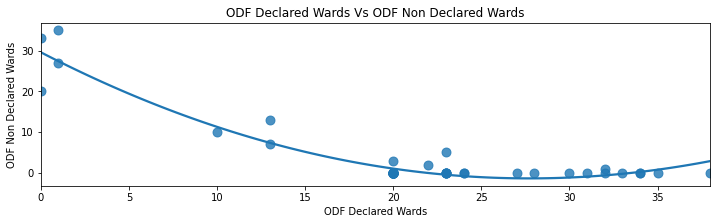

In [25]:
plt.title('ODF Declared Wards Vs ODF Non Declared Wards')
sns.regplot(x='ODF Declared Wards',y='ODF Non Declared Wards',data=df,scatter_kws={'s':80},order=2, ci=None);



### Inferences

1) Need for more compost yards in ULBs



2) Most of the ULBs has a decent amount of door to door collection in percentage

3) The garbage collection and generation has a linear relation